# Eulers metode for systemer av differensialligninger
Tidligere så vi på differensialligninger hvor den ukjente var en skalar størrelse, men ofte har man at den ukjente, og dermed også høyresiden, er en vektor.
Vi kan skrive

$$ \boldsymbol{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix} \quad \text{og} \quad \boldsymbol{f} = \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_m \end{bmatrix} $$

slik at disse er $m$-dimensjonale vektorer, og hvor hver komponent $f_i$ av $\boldsymbol{f}$ kan avhenge av alle komponentene i $\boldsymbol{x}$. Den tilhørende differensialligningen blir da
$$ \boldsymbol{x}'(t) = \boldsymbol{f}(\boldsymbol{x}(t)), \tag{3}$$
hvor $\boldsymbol{x}'$ betyr at man deriverer hver komponent med hensyn på $t$. I det tilhørende startverdiproblemet er også $\boldsymbol{x}(0)$ spesifisert.

Vi kan godt bruke Eulers metode i dette tilfellet også. La $\boldsymbol{x}(0) = \boldsymbol{x}_0$ være startverdien ved $t=0$, $t_n = n h$ for en steglengde $h>0$.
Helt analogt med det skalare tilfellet kan vi da definere tilnærmingen $\boldsymbol{x}_n$ av $\boldsymbol{x}(t_n)$ som

$$ \boldsymbol{x}_{n+1} = \boldsymbol{x}_n + h \boldsymbol{f}(\boldsymbol{x}_n), \quad n=0,1,\dots $$

I dette kurset begrenser vi oss til å se på lineære systemer på formen $\boldsymbol{f}(\boldsymbol{x}) = A\boldsymbol{x} + \boldsymbol{b}$, hvor $A$ er en konstant $m\times m$-matrise og $\boldsymbol{b}$ en konstant vektor.
Da vil ligning (3) tilsvare 
$$ \boldsymbol{x}'(t) = A \boldsymbol{x}(t) + \boldsymbol{b} \tag{4}$$
og den tilhørende Eulers metode blir
$$ \boldsymbol{x}_{n+1} = \boldsymbol{x}_n + h ( A \boldsymbol{x}_n + \boldsymbol{b}), \quad n=0,1,\dots $$

## Omskriving av andreordens differensialligninger
En andreordens lineær og homogen differensialligning med konstante koeffisienter er på formen
$$ x''(t) + b x'(t) + c x(t) = d \tag{5} $$
for en ukjent funksjon $x(t)$ og konstanter $b$, $c$ og $d$.
Merk at for det tilhørende startverdiproblemet må vi i tillegg til startverdien av den ukjente funksjonen også spesifisere startverdien til den førstederiverte: vi må altså ha verdien av både $x(0)$ og $x'(0)$.


Det er mulig å finne en generell løsning av (5), men vil vi i stedet vise hvordan den kan skrives om til et førsteordens lineært system av differensialligninger.
Dette kan gjøres ved å innføre variabelen $y(t) = x'(t)$, slik at ligningen ovenfor er ekvivalent til
$$ \begin{align} x'(t) &= y(t) \\ y'(t) &= d - c x(t) - b y(t) \end{align} \quad \iff \quad \begin{bmatrix} x'(t) \\ y'(t) \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -c & -b \end{bmatrix} \begin{bmatrix} x(t) \\ y(t) \end{bmatrix} + \begin{bmatrix} 0 \\ d \end{bmatrix}, $$
som er nøyaktig på formen til ligning (4).
For startverdiproblemet vil både $x(0)$ og $x'(0) = y(0)$ være gitt, slik at startverdien til vektoren med komponenter $x(t)$ og $y(t)$ også er gitt.

Samme idé kan brukes til å skrive om høyere ordens differensialligninger for én ukjent til førsteordens systemer av differensialligninger.
Tallet på ukjente (størrelsen av systemet) vil da være lik graden til den høyeste deriverte: slik som andreordensligningen (5) gav et system av to ukjente.

En av fordelene med å skrive om til et førsteordens system er at det er lett å definere Eulers metode for et slikt system.

### Eksempel: en ideell pendel
En idealisert pendel (en punktmasse opphengt i en masseløs stang) kan beskrives av differensialligningen
$$ \theta'' + \frac{g}{L}\sin(\theta) = 0 \tag{5} $$
hvor $\theta = \theta(t)$ er vinkelutslaget ved tid $t$, $\theta = 0$ betyr at pendelen henger rett ned.
Videre er $g$ gravitasjonskonstanten og $L$ er lengden av pendelen.
Dette er en andreordens *ikkelineær* differensialligning, som vi ikke kan løse eksakt.
Det er derimot ikke vanskelig å tilnærme løsningen med Eulers metode, og et av hovedgrunnene for å lære numeriske metoder er jo nettopp å kunne tilnærmet løse ligninger som ikke kan løses eksakt.

Men for små utslag $\theta$ har vi at $\sin(\theta) \approx \theta$, sånn at en tilnærming av denne ligningen er
$$ \theta'' + \omega^2 \theta = 0 \tag{6} $$
hvor vi har introdusert $\omega = \sqrt{g/L}$ siden både $g$ og $L$ er positive størrelser.
Dette er derimot en lineær annenordens differensialligning, og den eksakte løsningen vil vil være en lineærkombinasjon av de trigonometriske funksjonene $\sin(\omega t)$ og $\cos(\omega t)$.

Med fare for å motsi oss selv fra tidligere, la oss sammenligne Eulers metode for (5) med den eksakte løsningen gitt av tilnærmingen (6).
La oss velge $\omega = 1$, startvinkelen $\theta(0) = \theta_0 = 0$ og start-vinkelhastigheten $\theta'(0) = \theta'_0 = 1$.
Vi finner da at den forenklede ligningen (6) har løsningen $ \theta(t) = \sin(t) $.

Text(0.5, 1.0, "Vinkelhastighet $\\theta'$")

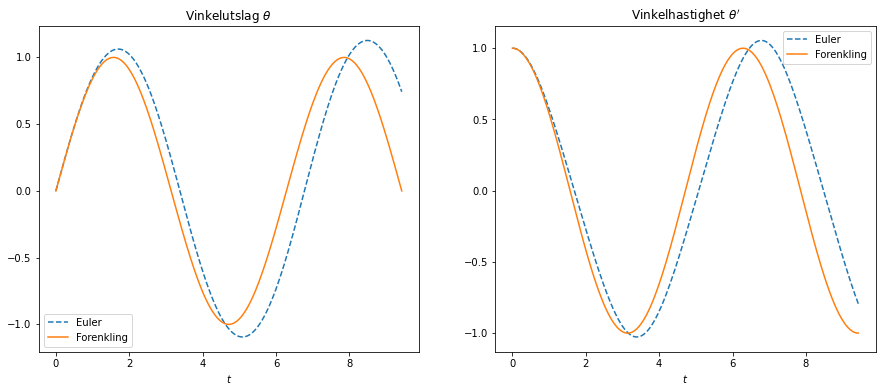

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

omega = 1 # omega
theta0 = 0 # startvinkel
dtheta0 = 1 #start-vinkelhastighet

T = 3*np.pi
N = 500
h = T/N
tn = np.linspace(0,T,N+1)

def Y(t): # eksakt løsnong av forenklet ligning
    return theta0*np.cos(omega*t) + (dtheta0/omega)*np.sin(omega*t)

def dY(t): # den deriverte av funksjonen ovenfor
    return -omega*theta0*np.sin(omega*t) + dtheta0*np.cos(omega*t)

Xn = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Xn[0,0] = theta0
Xn[0,1] = dtheta0

for k in range(0,N): # N steg med Eulers metode for opphavelig ligning
    Xn[k+1,0] = Xn[k,0] + h*Xn[k,1]
    Xn[k+1,1] = Xn[k,1] - h*(omega**2)*np.sin(Xn[k,0])

tm = np.linspace(0,T,301)

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.plot(tn, Xn[:,0],'--')
ax1.plot(tm,Y(tm))
ax1.set_xlabel(r'$t$')
ax1.legend(['Euler','Forenkling'])
ax1.set_title(r'Vinkelutslag $\theta$')

ax2.plot(tn,Xn[:,1],'--')
ax2.plot(tm,dY(tm))
ax2.set_xlabel(r'$t$')
ax2.legend(['Euler','Forenkling'])
ax2.set_title(r"Vinkelhastighet $\theta'$")



Vi ser her at vi har periodisk oppførsel for både tilnærmingen gitt av Eulers metode, og (selvfølgelig) for sinusbevegelsen til det forenklede systemet.
Dessuten indikerer tilnærmingen vi får med Eulers metode at perioden til det opphavelige systemet er lenger enn for det tilnærmede systemet.

Den periodiske oppførselen indikerer at ingen energi går tapt for dette systemet. En mer naturtro modell ville tatt hensyn til friksjon, som til ville fått pendelen til å svinge med stadig mindre utslag til den til slutt henger i ro.
Apropos energi, vi kan legge merke til at utslagene for tilnærmingen med Eulers metode blir gradivis litt større.
Dette er en bieffekt av Eulers metode, den eksakte løsingen skal ha like store utslag hver gang.
Man kan redusere denne økningen litt ved å velge en mindre steglengde $h$, men den vil alltid være der: på denne måten legger Eulers metode til energi som ikke er der.
Dette kan man også se ved å plotte $\theta$ og $\theta'$ mot hverandre: da skal man her engentlig få en lukket kurve (sirkel) her, som svarer til en bestemt mengde energi, men Eulers metode vil gi oss en spiral som går utover (til høyere energinivåer). ***Si mer om faseportretter? Implisitt Euler?***

**Merk**: Siden den forenklede ligningen ble utledet ved å anta små vinkelutslag er det en type oppførsel den ikke kan gi oss, og det er når pendelen har så stor energi at den roterer hele veien rundt istedenfor så svinge frem og tilbake. Prøv å doble start-vinkelhastigheten i koden ovenfor og se hva som skjer.



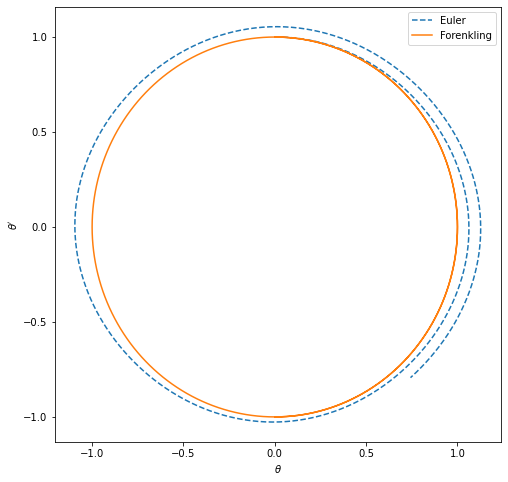

In [2]:
plt.figure(figsize=(8,8))
plt.plot(Xn[:,0],Xn[:,1],'--')
plt.plot(Y(tm),dY(tm))
plt.xlabel(r'$\theta$')
plt.ylabel(r"$\theta'$")
plt.legend(['Euler','Forenkling'])